In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Function som bounder mellem 0 og 1
def logit(z):
    return 1/(1+np.exp(-z))

# Function som finder afstanden mellem knuder
def dist(Zi,Zj):
    sum = 0
    for k in (0,len(Zi)-1):
        sum += (Zi[k]-Zj[k])**2
    return sum

# Function P(y|theta)
def prop(theta,y):
    return (theta**y)*((1-theta)**(1-y))

# Gradient function
def grad(point_number,index):
    gradient = 0
    alpha = 5
    for m in range(len(Y)):
        if ((Y[m][1] == point_number) or (Y[m][2] == point_number)): # Check to see if point_number is part of the edge
            connection = Y[m][0] # Check to see if there is a connection
            distance = (np.linalg.norm(points[Y[m][1]] - points[Y[m][2]]))**2 # Calculate the euclidean distance squared
            point_index_diff = (points[point_number][index] - points[Y[m][1]][index]) + (points[point_number][index] - points[Y[m][2]][index]) # Calculate Points_a,i-Points_b,i
            numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
            denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
            gradient += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together

    return gradient 

In [10]:
# Matrix Y, som er vores graf i matrixform.
Y_matrix = [[0, 1, 0, 0], 
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [0, 1, 1, 0]]

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

In [11]:
alpha = 5
# Set mean (mu) as a zero vector
mu = np.zeros(2)
# Set covariance matrix
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]])

# Generate random vectors
num_samples = 4  # Number of samples you want to generate

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}
points

{1: array([2.12414627, 0.44155286]),
 2: array([0.430515  , 0.01927511]),
 3: array([1.18738313, 1.75262668]),
 4: array([0.90107938, 1.88139926])}

In [12]:
n = 50
graf = np.zeros(n)
for k in range(n):
    for i in range(1,5):
        for j in range(2):
            points[i][j] += 0.1*grad(i,j)
            
    joint_prob = 0
    for m in range(len(Y)):
        distance = dist(points[Y[m][1]], points[Y[m][2]])
        theta_ij = logit(alpha - distance)
        joint_prob += np.log(prop(theta_ij, Y[m][0]))
    graf[k] = joint_prob


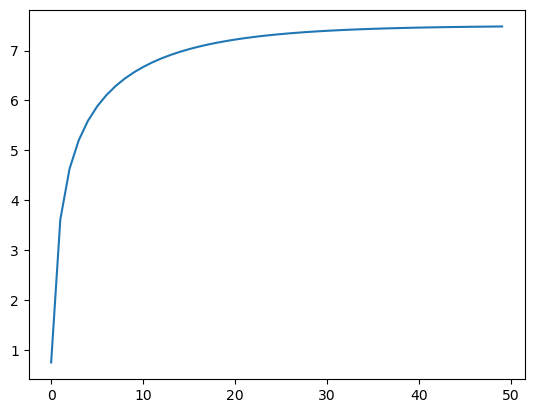

In [13]:
plt.plot(graf)

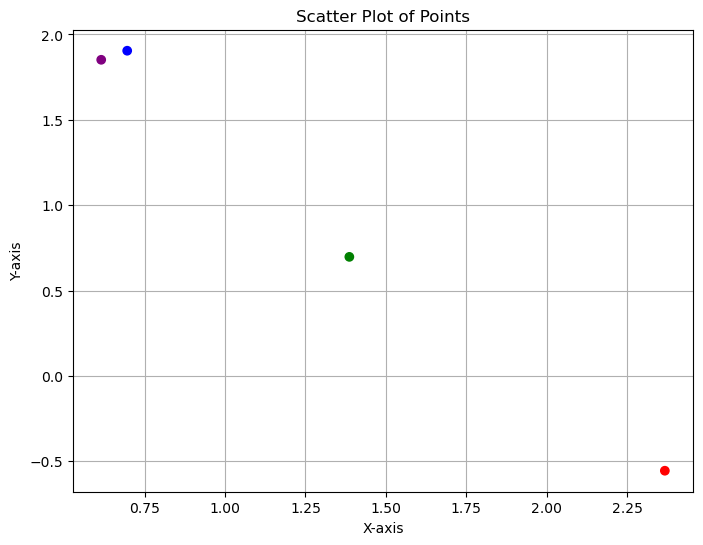

In [14]:
#points

x = [points[i+1][0] for i in range(4)]
y = [points[i+1][1] for i in range(4)]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color=['red', 'green', 'blue', 'purple'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')
plt.grid(True)
#plt.xlim(-1.6, 1.6)
#plt.ylim(-1.6, 1.6)
plt.show()
